In [1]:
using Giac

In [2]:
@giac x y z # define some Giac identifiers

(x,y,z)

In [3]:
ex = exp(x)*sin(x) # build a symbolic expression

exp(x)*sin(x)

In [4]:
diff(ex, x) # perform symbolic manipulations

exp(x)*sin(x)+exp(x)*cos(x)

In [5]:
ex = convert(giac, sqrt(2)) # not what we expected: sqrt(2) is computed by Julia first and then transferred to Giac

1.41421356237

In [6]:
ex = convert(giac,"sqrt(2)") # OK, uses the giac parser

sqrt(2)

In [7]:
convert(Number, ex) # convert back to a Julia number, 

1.4142135623730923

In [8]:
@giac Digits=100 # Want more digits? Change Giac configuration parameter Digits.

100

In [9]:
convert(Number, ex)

1.414213562373095048801688724209698078569671875376948073176679737990732478462102

In [10]:
ex = giac("sqrt(2)") # has the same effect as ex=convert(giac,"sqrt(2)") from above.

sqrt(2)

In [11]:
ex = sqrt(giac(2)) # this has the same effect, too. 

sqrt(2)

In [12]:
ex=2^200 # this is done in Int64 arithmetics, results in overflow and gives a nonsense answer.

0

In [13]:
ex=BigInt(2)^200 # OK, uses Julia BigInt arithmetics. The result is a BigInt.

1606938044258990275541962092341162602522202993782792835301376

In [14]:
typeof(ex)

BigInt

In [15]:
ex=giac(2)^200 # OK, uses Giac arithmetics. The result is a Giac object.

1606938044258990275541962092341162602522202993782792835301376

In [16]:
typeof(ex)

Giac.giac_ZINT

In [17]:
ex=convert(Number, ex) # convert Giac object back to Julia number

1606938044258990275541962092341162602522202993782792835301376

In [18]:
typeof(ex)

BigInt

In [19]:
@giac a=17 # define a Giac variable

17

In [20]:
typeof(a) # 

Giac.giac_IDNT

In [21]:
a # not evaluated

a

In [22]:
ex = evaluate(a) # now we get the value of the variable as a Giac object

17

In [23]:
typeof(ex)

Giac.giac_INT_

In [24]:
ex = convert(Number, a) # now we get the value of the variable as a Julia number

17

In [25]:
typeof(ex)

Int32

In [26]:
evaluate(giac("a")) # the value of a is available inside Giac

17

In [27]:
evaluate(giac("a:=2")) # the value of a can be changed inside of Giac

2

In [28]:
evaluate(a)

2

In [29]:
store(4,a)

4

In [30]:
evaluate(a)

4

In [31]:
@giac f(x)=sin(x) # define a Giac function 

 (x)->sin(x)

In [32]:
evaluate(f(1)) # use the function

sin(1)

In [33]:
evaluate(f(pi))

0

In [34]:
f'(x) # ' gives the derivative 

cos(x)

In [35]:
f'(pi) 

-1

In [36]:
f1 = convert(Function, f) # Convert a Giac function to a Julia function. 
                          # Conversion uses Julia's LLVM-based just-in-time compiler, 
                          # thus the resulting Julia function is evaluated very fast.

(anonymous function)

In [37]:
typeof(f)

Giac.giac_IDNT

In [38]:
typeof(f1)

Function

In [39]:
map( f1, linspace(-pi,pi,8) ) # f1 can be used as any Julia function 

8-element Array{Float64,1}:
 -1.22465e-16
 -0.781831   
 -0.974928   
 -0.433884   
  0.433884   
  0.974928   
  0.781831   
  1.22465e-16

In [40]:
map( f, linspace(-pi,pi,8) ) # actually, sometimes also f can be used where a Julia function is expected,  
                             # but not always with the same effect

8-element Array{Giac.giac_SYMB,1}:
 f(-3.1415926535898) 
 f(-2.2439947525641) 
 f(-1.3463968515385) 
 f(-0.44879895051283)
 f(0.44879895051283) 
 f(1.3463968515385)  
 f(2.2439947525641)  
 f(3.1415926535898)  

In [41]:
@giac g(x,y)=x*y # define a Giac function with two arguments

 (x,y)->x*y

In [42]:
evaluate(g(2,sqrt(giac(2)))) # use the function

2*sqrt(2)

In [43]:
g1=convert(Function, g) # convert to a Julia function

(anonymous function)

In [44]:
g1(2,sqrt(2))

2.8284271247461903

In [45]:
giac_vars() # print all Giac variables (including userdefined functions)

3-element Array{Pair{A,B},1}:
 a=>4           
 f=> (x)->sin(x)
 g=> (x,y)->x*y 

In [46]:
using Gadfly # plotting is best left to a suitable Julia package

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/hofi/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /home/hofi/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/hofi/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /home/hofi/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [47]:
set_default_plot_size(24cm, 16cm)

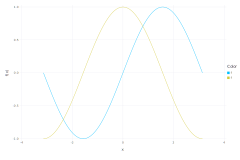

In [48]:
plot([convert(Function,f), convert(Function,f')], -pi, pi)

In [49]:
mysqcu = giac("""
  proc(x) // comment inside Giac  program
    if x > 0 then 
      x^2 
    else
      x^3 
    fi 
  end
""") # define Giac program

// Success


 (x)-> 
  if (x>0) x^2; else x^3; ; 

In [50]:
mysqcu(5)

25

In [51]:
mysqcu(-5)

-125